In [2]:

from pcpptc import PolygonInstance
from pcpptc.grid_solver.cycle_cover.fractional_grid_solver import FractionalGridSolver
from pcpptc.grid_solver.grid_instance import VertexPassage
from pcpptc.grid_solver.grid_solution import FractionalSolution
from pcpptc.grid_solver.grid_solution.coverage_analysis import compute_coverage_polygon_of_grid
from pcpptc.instance_converter import RotatingRegularSquare, RotatingRegularHexagonal
from pcpptc.instance_converter.dmsh import DmshGrid
import numpy as np
from pcpptc.plot import setup_plot, plot_polygon_instance
import matplotlib.pyplot as plt

<Figure size 432x288 with 0 Axes>

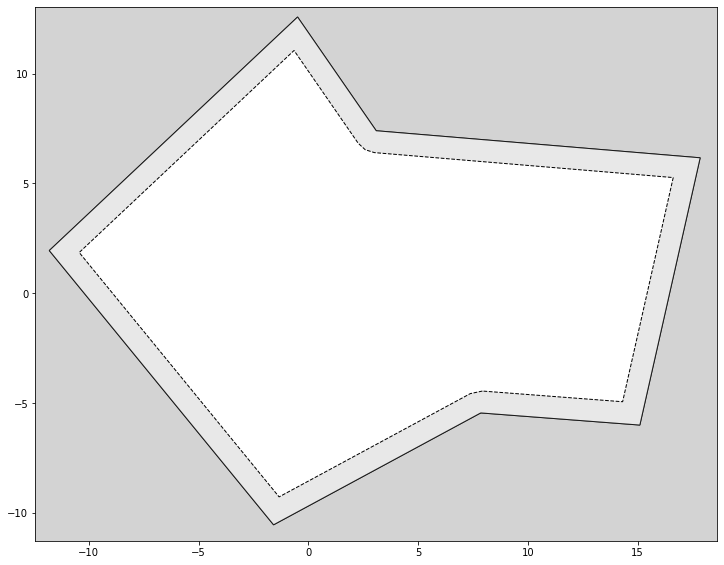

In [3]:
from pcpptc.plot.intermediate import plot_graph, plot_points, plot_fractional_solution, plot_turn

pi = PolygonInstance.from_json(file_path="./01c_instance.json")
ax = setup_plot()
plot_polygon_instance(ax, pi, plot_valuable_areas=False)
plt.show()
pi.expensive_areas = []



In [4]:
figsize = (3.5, 3.5)

In [5]:
t = DmshGrid(full_coverage=True, point_based=True, buffer=0.1, simplification=0.1)
gi3 = t(pi)

<Figure size 432x288 with 0 Axes>

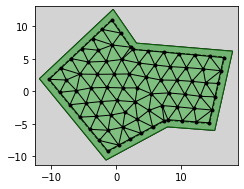

In [6]:
ax = setup_plot(figsize=figsize)
#ax = setup_plot()
plot_polygon_instance(ax, pi)
plot_graph(ax, gi3.graph, marker='.', vertex_color='black', edge_color='black')
plt.tight_layout()
plt.show()

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (linux64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 274 rows, 1246 columns and 3346 nonzeros
Model fingerprint: 0x1759e4a0
Coefficient statistics:
  Matrix range     [1e+00, 2e+00]
  Objective range  [2e+00, 6e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+00]
Presolve time: 0.01s
Presolved: 274 rows, 1246 columns, 3346 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    0.0000000e+00   7.800000e+01   0.000000e+00      0s
     279    2.0796692e+02   0.000000e+00   0.000000e+00      0s

Solved in 279 iterations and 0.01 seconds
Optimal objective  2.079669152e+02
Adding VertexPassage(PointVertex[140527609294032]@(-8.672899097928592, -0.1480735350350233)<- PointVertex[140527607756752]@(-10.30032179019641, 1.8418641968494436) ->PointVertex[140527609299728]@(-7.683499495238309, 1.7389773048531512))>=1
Gurobi Optimizer version 9.1.2 

<Figure size 432x288 with 0 Axes>

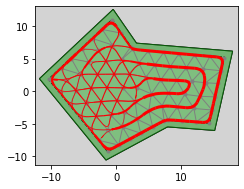

In [12]:
from optimizer.grid_solver.cycle_cover.fractional_grid_solver.integralizer import IntegralizingFractionalSolver

fs = IntegralizingFractionalSolver()(gi3, 40)
ax = setup_plot(figsize=figsize)
plot_polygon_instance(ax, pi)
plot_graph(ax, gi3.graph, marker='.', vertex_color='grey', edge_color='grey')
plot_fractional_solution(ax, fs, color="red", linewidth=3.0, zorder=3)
plt.tight_layout()
plt.show()

In [55]:
from pcpptc.utils import Point
from pcpptc.grid_solver import PointVertex
from pcpptc.grid_solver.cycle_cover.atomic_strip_orientation.atomic_strip import AtomicStripBlueprint
import typing
import math


def __get_end_points(point, orientation, l):
    p0 = point + l * Point(math.cos(orientation),
                           math.sin(orientation))
    p1 = point + l * Point(math.cos(orientation + math.pi),
                           math.sin(orientation + math.pi))
    return p0, p1


def plot_atomic_strips(ax: plt.Axes,
                       atomic_strips: typing.Dict[
                           PointVertex, typing.List[AtomicStripBlueprint]],
                       tool_radius: float):
    for p, atomic_strips in atomic_strips.items():
        for o in atomic_strips:
            if o.is_skippable() and not o.has_penalty():
                p0, p1 = __get_end_points(p.point, o.orientation, 0.7 * tool_radius)
                #ax.plot([p0.x, p1.x], [p0.y, p1.y], c='orange', ls=":")
        for o in atomic_strips:
            if o.is_skippable() and o.has_penalty():
                p0, p1 = __get_end_points(p.point, o.orientation, 0.8 * tool_radius)
                ax.plot([p0.x, p1.x], [p0.y, p1.y], c='blue', ls="--")
        for o in atomic_strips:
            if not o.is_skippable():
                p0, p1 = __get_end_points(p.point, o.orientation, 0.9 * tool_radius)
                ax.plot([p0.x, p1.x], [p0.y, p1.y], c='black', ls="-")
                ax.scatter([p0.x, p1.x], [p0.y, p1.y], c='black', marker='o', zorder=3,
                           s=10)

<Figure size 432x288 with 0 Axes>

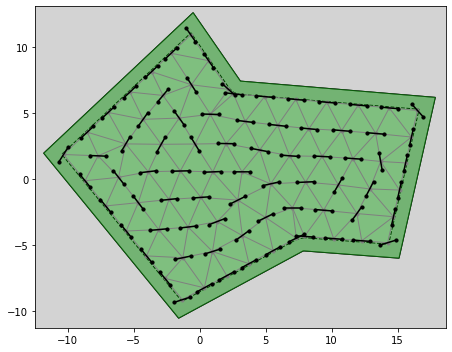

In [57]:
from optimizer.grid_solver.cycle_cover.atomic_strip_orientation import EquiangularRepetitionAtomicStrips

strip_alg = EquiangularRepetitionAtomicStrips(3, 1)
atomic_strips = strip_alg(gi3, fs)
ax = setup_plot(figsize=(7, 5))
plot_polygon_instance(ax, pi)
plot_graph(ax, gi3.graph, marker='.', vertex_color='grey', edge_color='grey')
plot_atomic_strips(ax, atomic_strips, 0.7)
plt.tight_layout()
plt.savefig("05b_atomic_strip_selection_example.pdf")
plt.show()

)